#훈련된 컨브넷 사용하기

In [8]:
import keras

from keras.applications import VGG16


conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

In [10]:
import tensorflow as tf


gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)


sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


In [11]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [17]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


base_dir = 'C:/Users/Affinity/Google 드라이브/lecture/l_d/p6/cats_and_dogs/small/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [19]:
from keras import models
from keras import layers
from keras import optimizers


model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels))

Instructions for updating:
Use tf.cast instead.
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6064 - acc: 0.6620 - val_loss: 0.4312 - val_acc: 0.8340
Epoch 2/30
2000/2000 [==============================] - 1s 474us/step - loss: 0.4342 - acc: 0.8025 - val_loss: 0.3663 - val_acc: 0.8380
Epoch 3/30
2000/2000 [==============================] - 1s 468us/step - loss: 0.3555 - acc: 0.8475 - val_loss: 0.3228 - val_acc: 0.8680
Epoch 4/30
2000/2000 [==============================] - 1s 480us/step - loss: 0.3145 - acc: 0.8680 - val_loss: 0.3014 - val_acc: 0.8810
Epoch 5/30
2000/2000 [==============================] - 1s 468us/step - loss: 0.2858 - acc: 0.8840 - val_loss: 0.2825 - val_acc: 0.8880
Epoch 6/30
2000/2000 [==============================] - 1s 469us/step - loss: 0.2664 - acc: 0.8965 - val_loss: 0.2796 - val_acc: 0.8900
Epoch 7/30
2000/2000 [==============================] - 1s 473us/step - loss: 0.2384 - acc

In [22]:
from keras import models
from keras import layers
from keras import optimizers


model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 702us/step - loss: 0.5920 - acc: 0.6760 - val_loss: 0.4177 - val_acc: 0.8400
Epoch 2/30
2000/2000 [==============================] - 1s 402us/step - loss: 0.4146 - acc: 0.8130 - val_loss: 0.3602 - val_acc: 0.8380
Epoch 3/30
2000/2000 [==============================] - 1s 398us/step - loss: 0.3399 - acc: 0.8540 - val_loss: 0.3104 - val_acc: 0.8830
Epoch 4/30
2000/2000 [==============================] - 1s 401us/step - loss: 0.2997 - acc: 0.8745 - val_loss: 0.2905 - val_acc: 0.8830
Epoch 5/30
2000/2000 [==============================] - 1s 415us/step - loss: 0.2776 - acc: 0.8855 - val_loss: 0.2763 - val_acc: 0.8840
Epoch 6/30
2000/2000 [==============================] - 1s 407us/step - loss: 0.2570 - acc: 0.9000 - val_loss: 0.2672 - val_acc: 0.8890
Epoch 7/30
2000/2000 [==============================] - 1s 402us/step - loss: 0.2397 - acc: 0.9095 - val_loss: 0.2605 - val_acc: 0.8950


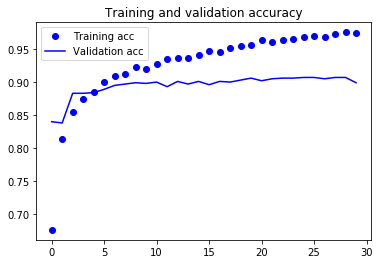

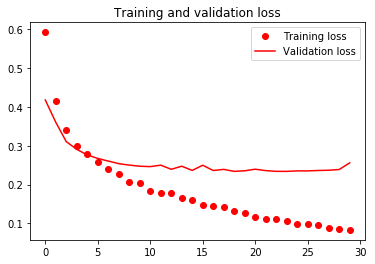

In [26]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [32]:
print('conv_base를 동결하기전 훈련되는 가중치의수',
     len(model.trainable_weights))

conv_base를 동결하기전 훈련되는 가중치의수 30


In [33]:
conv_base.trainable = False

In [34]:
print('conv_base를 동결한 후 훈련되는 가중치의수',
     len(model.trainable_weights))

conv_base를 동결한 후 훈련되는 가중치의수 4


In [38]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


C:\Users\Affinity\.conda\envs\keras\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Affinity\.conda\envs\keras\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Affinity\.conda\envs\keras\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Affinity\.conda\envs\keras\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Affinity\.conda\envs\keras\lib\site-packages\P

 - 24s - loss: 0.5339 - acc: 0.7470 - val_loss: 0.4221 - val_acc: 0.8400
Epoch 2/30
 - 28s - loss: 0.4044 - acc: 0.8290 - val_loss: 0.3458 - val_acc: 0.8560
Epoch 3/30
 - 34s - loss: 0.3633 - acc: 0.8395 - val_loss: 0.3063 - val_acc: 0.8870
Epoch 4/30
 - 36s - loss: 0.3224 - acc: 0.8680 - val_loss: 0.2854 - val_acc: 0.8850
Epoch 5/30
 - 36s - loss: 0.3041 - acc: 0.8795 - val_loss: 0.2740 - val_acc: 0.8830
Epoch 6/30
 - 37s - loss: 0.2859 - acc: 0.8780 - val_loss: 0.2678 - val_acc: 0.8940
Epoch 7/30
 - 39s - loss: 0.2719 - acc: 0.8845 - val_loss: 0.2558 - val_acc: 0.8950
Epoch 8/30
 - 42s - loss: 0.2643 - acc: 0.8915 - val_loss: 0.2569 - val_acc: 0.8950
Epoch 9/30
 - 39s - loss: 0.2542 - acc: 0.9010 - val_loss: 0.2484 - val_acc: 0.8960
Epoch 10/30
 - 39s - loss: 0.2480 - acc: 0.9010 - val_loss: 0.2443 - val_acc: 0.8930
Epoch 11/30
 - 41s - loss: 0.2393 - acc: 0.9010 - val_loss: 0.2429 - val_acc: 0.9100
Epoch 12/30
 - 40s - loss: 0.2350 - acc: 0.8995 - val_loss: 0.2396 - val_acc: 0.9010


In [39]:
model.save('cats_and_dogs_small_3.h5')

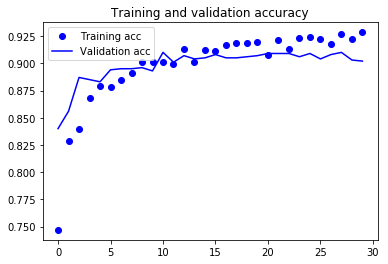

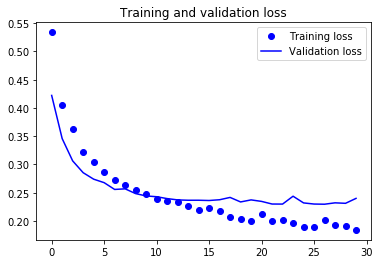

In [40]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [42]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [43]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 28s 284ms/step - loss: 0.1828 - acc: 0.9275 - val_loss: 0.2077 - val_acc: 0.9160
Epoch 2/100
100/100 [==============================] - 36s 360ms/step - loss: 0.1684 - acc: 0.9245 - val_loss: 0.2474 - val_acc: 0.9080
Epoch 3/100
100/100 [==============================] - 38s 380ms/step - loss: 0.1365 - acc: 0.9435 - val_loss: 0.2198 - val_acc: 0.9130
Epoch 4/100
100/100 [==============================] - 38s 384ms/step - loss: 0.1194 - acc: 0.9565 - val_loss: 0.1990 - val_acc: 0.9280
Epoch 5/100
100/100 [==============================] - 39s 387ms/step - loss: 0.1062 - acc: 0.9580 - val_loss: 0.2060 - val_acc: 0.9120
Epoch 6/100
100/100 [==============================] - 39s 391ms/step - loss: 0.0911 - acc: 0.9650 - val_loss: 0.2216 - val_acc: 0.9200
Epoch 7/100
100/100 [==============================] - 41s 413ms/step - loss: 0.0862 - acc: 0.9635 - val_loss: 0.1905 - val_acc: 0.9290
Epoch 8/100
100/100 [===========================

In [44]:
model.save('cats_and_dogs_small_4.h5')

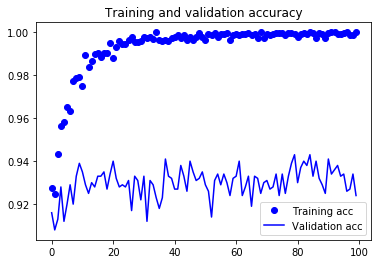

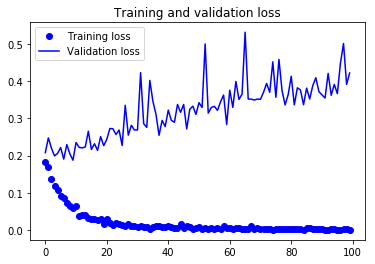

In [45]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

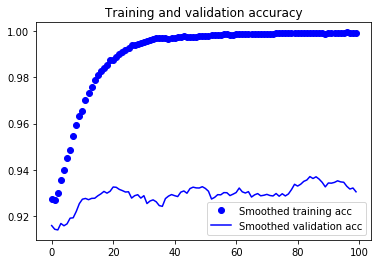

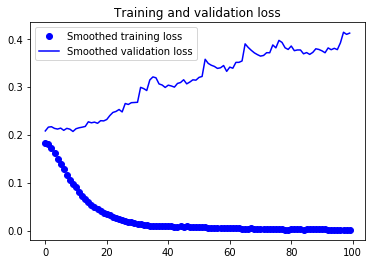

In [46]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [47]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.943999992609024
